<a href="https://colab.research.google.com/github/vaishnavi3013/Student-grade-prediction/blob/main/Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/student+performance.zip','r') as zipObj:
 zipObj.extractall('drive/MyDrive/student')

In [ ]:
with ZipFile('drive/MyDrive/student/student.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/studentp')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# allow plots to appear directly in the notebook
%matplotlib inline
data= pd.read_csv('/content/drive/MyDrive/studentp/student-mat.csv',sep=';')


In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.shape

(395, 33)

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64
['F' 'M']
F    208
M    187
Name: sex, dtype: int64
[18 17 15 16 19 22 20 21]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
['U' 'R']
U    307
R     88
Name: address, dtype: int64
['GT3' 'LE3']
GT3    281
LE3    114
Name: famsize, dtype: int64
['A' 'T']
T    354
A     41
Name: Pstatus, dtype: int64
[4 1 3 2 0]
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
[4 1 2 3 0]
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher']
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home']
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
['course' 'other' 'home' 'reputation']
course        145
home          109
reputation    105
other          3

In [ ]:
data.drop(['famsize','reason' ,'guardian' , 'nursery','famrel'], axis = 1, inplace = True)

In [ ]:
data.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,A,4,4,at_home,teacher,2,...,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,T,1,1,at_home,other,1,...,no,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,T,1,1,at_home,other,1,...,no,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,T,4,2,health,services,1,...,yes,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,T,3,3,other,other,1,...,no,3,2,1,2,5,4,6,10,10


In [ ]:
data.shape

(395, 28)

<ipython-input-29-215428d5d0b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis')


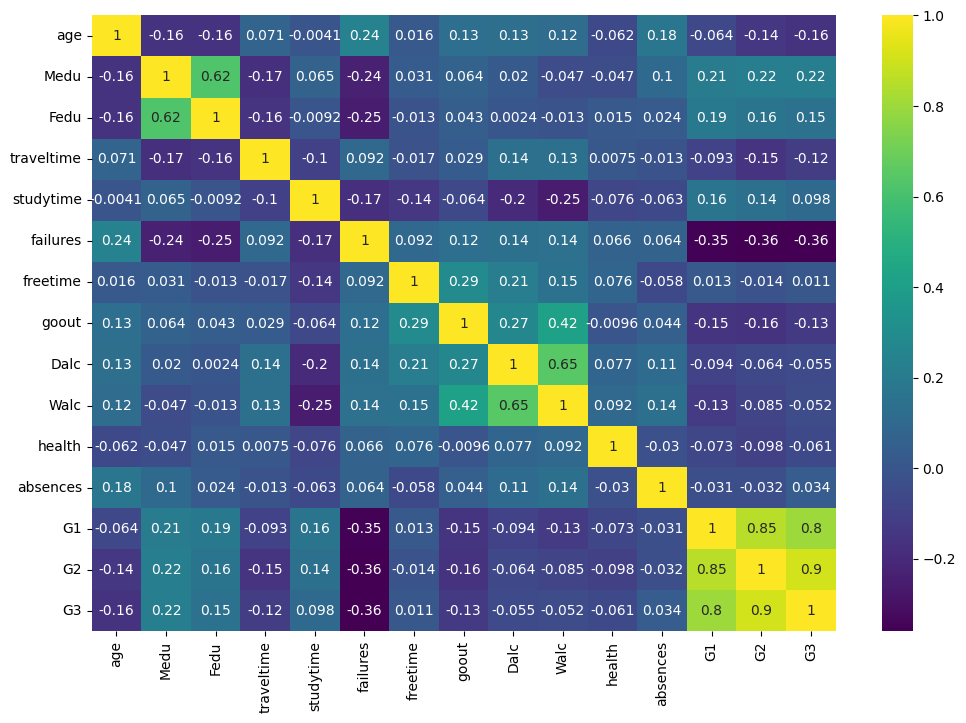

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

In [ ]:
data["sex"] = data["sex"].replace({'M': 0, 'F': 1})
data.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,A,4,4,at_home,teacher,2,...,no,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,T,1,1,at_home,other,1,...,no,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,T,1,1,at_home,other,1,...,no,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,T,4,2,health,services,1,...,yes,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,T,3,3,other,other,1,...,no,3,2,1,2,5,4,6,10,10


In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,A,4,4,at_home,teacher,2,2,0,yes,no,no,no,yes,no,no,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,T,1,1,at_home,other,1,2,0,no,yes,no,no,yes,yes,no,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,T,1,1,at_home,other,1,2,3,yes,no,yes,no,yes,yes,no,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,T,4,2,health,services,1,3,0,no,yes,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,T,3,3,other,other,1,2,0,no,yes,yes,no,yes,no,no,3,2,1,2,5,4,6,10,10


In [ ]:
missing_values_columns = [col for col in data.columns if data.isnull().sum()[col] > 0]
missing_values_columns

[]

In [ ]:
data["school"] = data["school"].replace({'GP': 0, 'MS': 1})
data["schoolsup"] = data["schoolsup"].replace({'no': 0, 'yes': 1})
data["famsup"] = data["famsup"].replace({'no': 0, 'yes': 1})
data["paid"] = data["paid"].replace({'no': 0, 'yes': 1})
data["activities"] = data["activities"].replace({'no': 0, 'yes': 1})
data["higher"] = data["higher"].replace({'no': 0, 'yes': 1})
data["internet"] = data["internet"].replace({'no': 0, 'yes': 1})
data["romantic"] = data["romantic"].replace({'no': 0, 'yes': 1})
data.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,U,A,4,4,at_home,teacher,2,2,0,1,0,0,0,1,0,0,3,4,1,1,3,6,5,6,6
1,0,1,17,U,T,1,1,at_home,other,1,2,0,0,1,0,0,1,1,0,3,3,1,1,3,4,5,5,6
2,0,1,15,U,T,1,1,at_home,other,1,2,3,1,0,1,0,1,1,0,3,2,2,3,3,10,7,8,10
3,0,1,15,U,T,4,2,health,services,1,3,0,0,1,1,1,1,1,1,2,2,1,1,5,2,15,14,15
4,0,1,16,U,T,3,3,other,other,1,2,0,0,1,1,0,1,0,0,3,2,1,2,5,4,6,10,10


In [ ]:
X=data.drop(['G3'],axis=1)
X

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,U,A,4,4,at_home,teacher,2,2,0,1,0,0,0,1,0,0,3,4,1,1,3,6,5,6
1,0,1,17,U,T,1,1,at_home,other,1,2,0,0,1,0,0,1,1,0,3,3,1,1,3,4,5,5
2,0,1,15,U,T,1,1,at_home,other,1,2,3,1,0,1,0,1,1,0,3,2,2,3,3,10,7,8
3,0,1,15,U,T,4,2,health,services,1,3,0,0,1,1,1,1,1,1,2,2,1,1,5,2,15,14
4,0,1,16,U,T,3,3,other,other,1,2,0,0,1,1,0,1,0,0,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,U,A,2,2,services,services,1,2,2,0,1,1,0,1,0,0,5,4,4,5,4,11,9,9
391,1,0,17,U,T,3,1,services,services,2,1,0,0,0,0,0,1,1,0,4,5,3,4,2,3,14,16
392,1,0,21,R,T,1,1,other,other,1,1,3,0,0,0,0,1,0,0,5,3,3,3,3,3,10,8
393,1,0,18,R,T,3,2,services,other,3,1,0,0,0,0,0,1,1,0,4,1,3,4,5,0,11,12


In [ ]:
y = data['G3']
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
X= pd.get_dummies(X, drop_first=True)
X

,school,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,address_U,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,1,18,4,4,2,2,0,1,0,0,0,1,0,0,3,4,1,1,3,6,5,6,1,0,0,0,0,0,0,0,0,1
1,0,1,17,1,1,1,2,0,0,1,0,0,1,1,0,3,3,1,1,3,4,5,5,1,1,0,0,0,0,0,1,0,0
2,0,1,15,1,1,1,2,3,1,0,1,0,1,1,0,3,2,2,3,3,10,7,8,1,1,0,0,0,0,0,1,0,0
3,0,1,15,4,2,1,3,0,0,1,1,1,1,1,1,2,2,1,1,5,2,15,14,1,1,1,0,0,0,0,0,1,0
4,0,1,16,3,3,1,2,0,0,1,1,0,1,0,0,3,2,1,2,5,4,6,10,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,2,2,1,2,2,0,1,1,0,1,0,0,5,4,4,5,4,11,9,9,1,0,0,0,1,0,0,0,1,0
391,1,0,17,3,1,2,1,0,0,0,0,0,1,1,0,4,5,3,4,2,3,14,16,1,1,0,0,1,0,0,0,1,0
392,1,0,21,1,1,1,1,3,0,0,0,0,1,0,0,5,3,3,3,3,3,10,8,0,1,0,1,0,0,0,1,0,0
393,1,0,18,3,2,3,1,0,0,0,0,0,1,1,0,4,1,3,4,5,0,11,12,0,1,0,0,1,0,0,1,0,0


<ipython-input-10-215428d5d0b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='viridis')


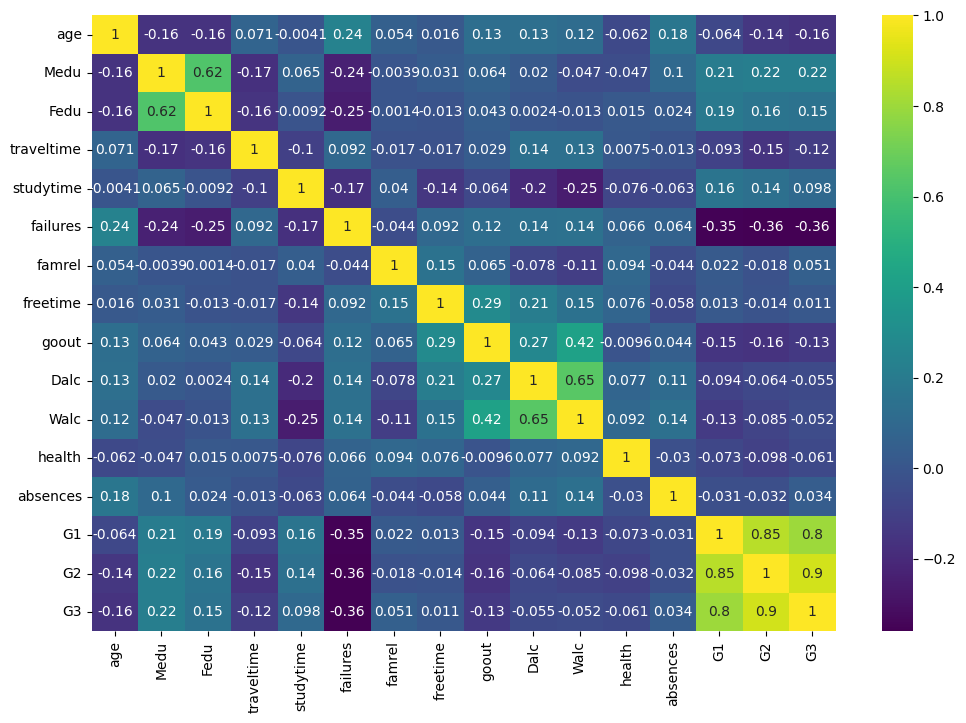

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()

Text(0.5, 1.0, 'Bar Plot of Final Grade with School')

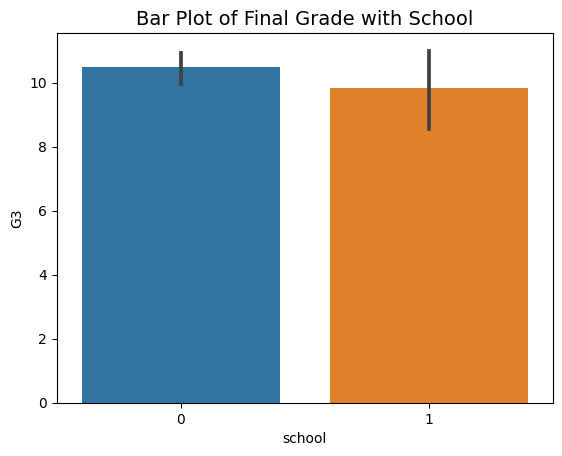

In [ ]:

plot = sns.barplot(x=data["school"],y=data["G3"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="horizontal")
plot.set_title("Bar Plot of Final Grade with School", fontsize=14)

<Axes: xlabel='G3'>

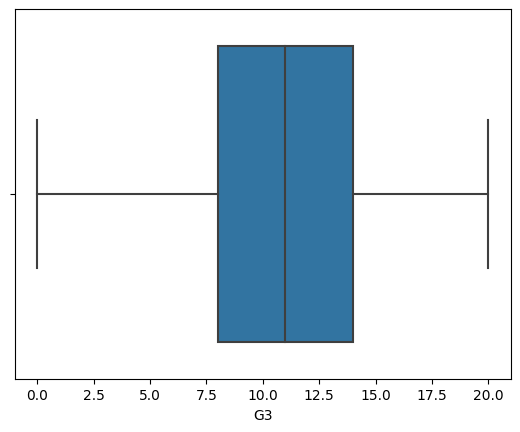

In [ ]:
 sns.boxplot(x=data.G3)

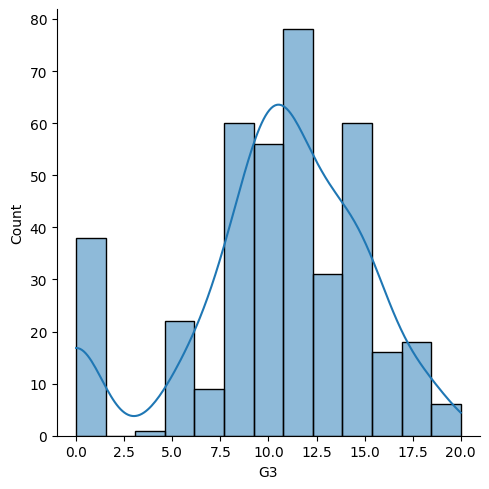

In [ ]:
plot = sns.displot(data=data["G3"], kde=True)

In [ ]:
from scipy.stats import zscore
from numpy import where,abs,median,nan,sqrt

In [ ]:
data["G3"] = data["G3"].replace([data["G3"][(abs(zscore(data["G3"])) > 3)]], median(data["G3"]))

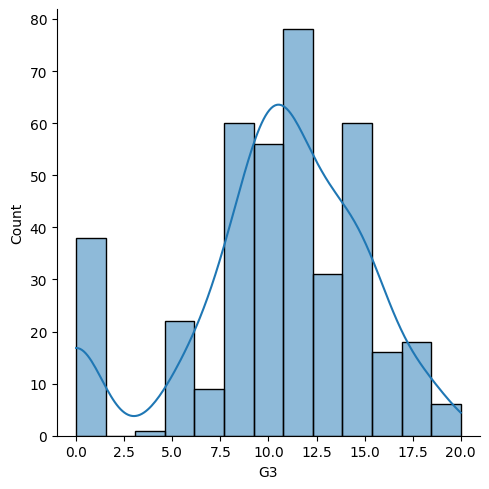

In [ ]:
plot = sns.displot(data=data["G3"], kde=True)

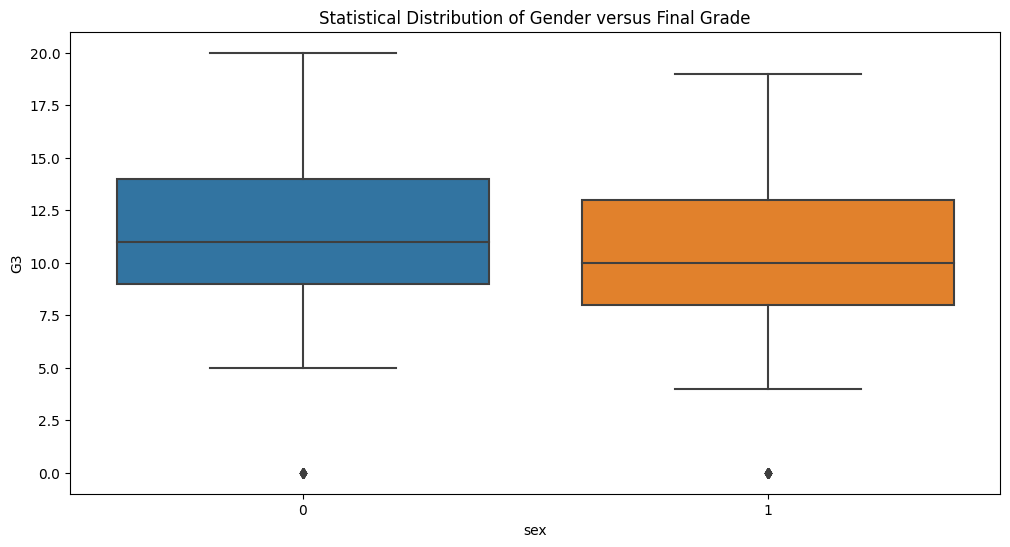

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['sex'], y=data['G3'] )

plt.title('Statistical Distribution of Gender versus Final Grade')
plt.show()

<Axes: xlabel='Pstatus', ylabel='G3'>

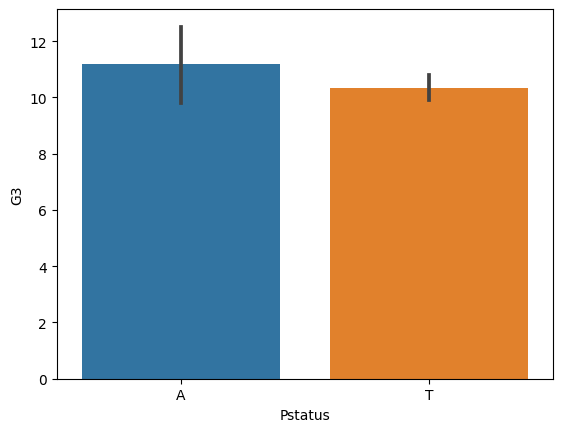

In [ ]:
sns.barplot(x=data["Pstatus"],y=data["G3"])

<Axes: xlabel='goout', ylabel='G3'>

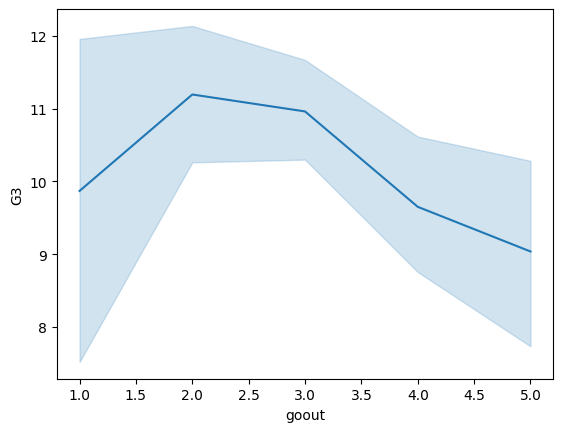

In [ ]:
sns.lineplot(x=data["goout"],y=data["G3"])

<Axes: xlabel='studytime', ylabel='G3'>

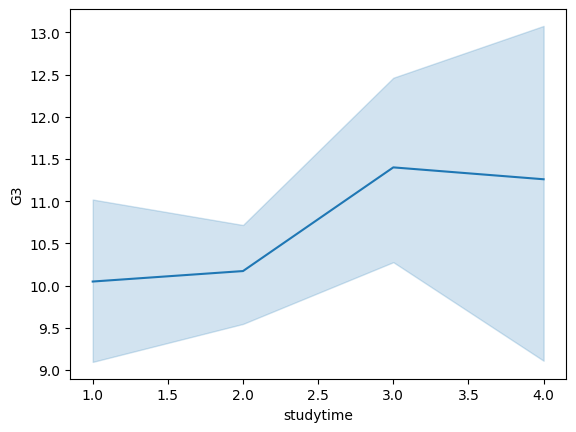

In [ ]:
sns.lineplot(x=data["studytime"],y=data["G3"])

<Axes: xlabel='absences', ylabel='G3'>

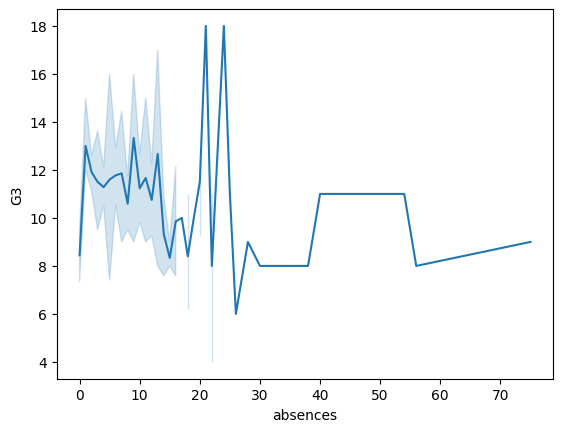

In [ ]:
sns.lineplot(x=data["absences"],y=data["G3"])

In [ ]:
data.Mjob.value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [ ]:
data.Fjob.value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

Text(0.5, 1.0, 'Bar Plot of failures with Grades')

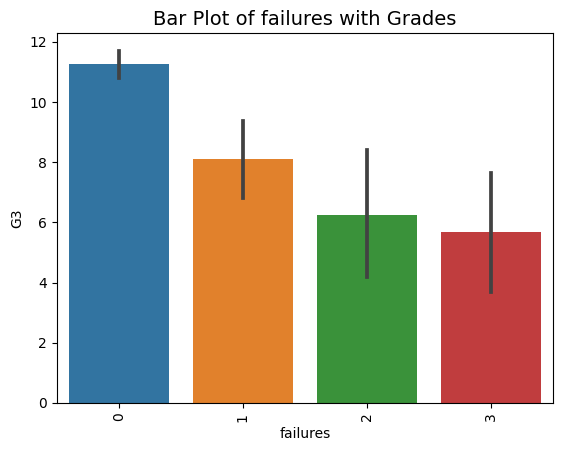

In [ ]:
plot = sns.barplot(x=data["failures"],y=data["G3"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of failures with Grades", fontsize=14)

<Axes: xlabel='age', ylabel='G3'>

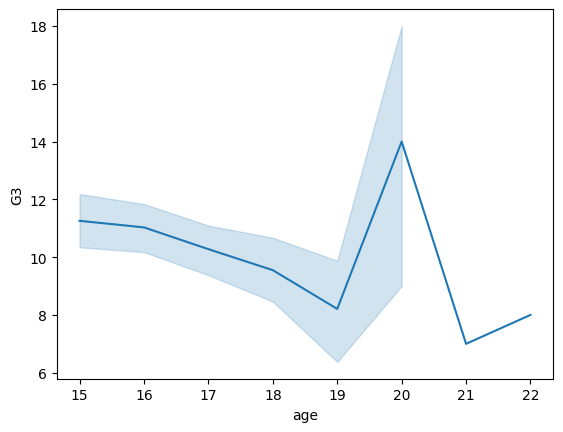

In [ ]:
sns.lineplot(x=data["age"],y=data["G3"])

<Axes: xlabel='paid', ylabel='G3'>

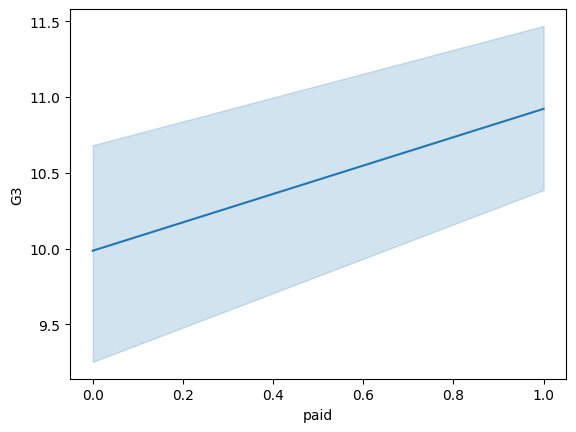

In [ ]:
sns.lineplot(x=data["paid"],y=data["G3"])

Text(0.5, 1.0, 'Bar Plot of Higher Education with Grades')

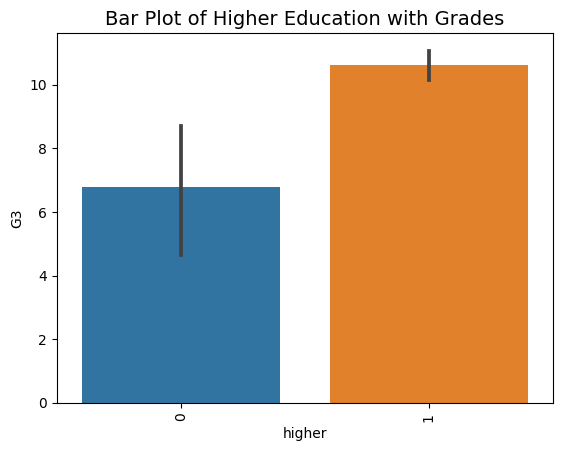

In [ ]:
plot = sns.barplot(x=data["higher"],y=data["G3"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of Higher Education with Grades", fontsize=14)

<Axes: xlabel='internet', ylabel='G3'>

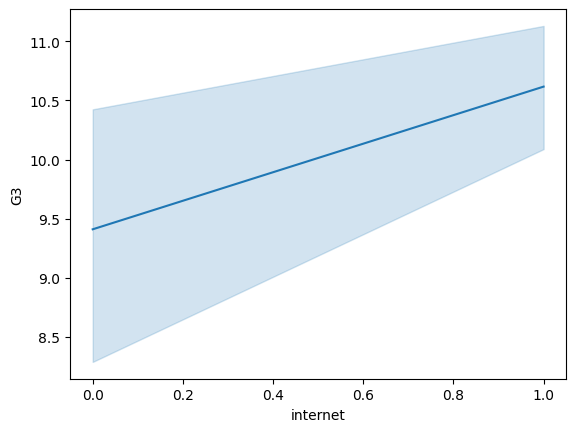

In [ ]:
sns.lineplot(x=data["internet"],y=data["G3"])

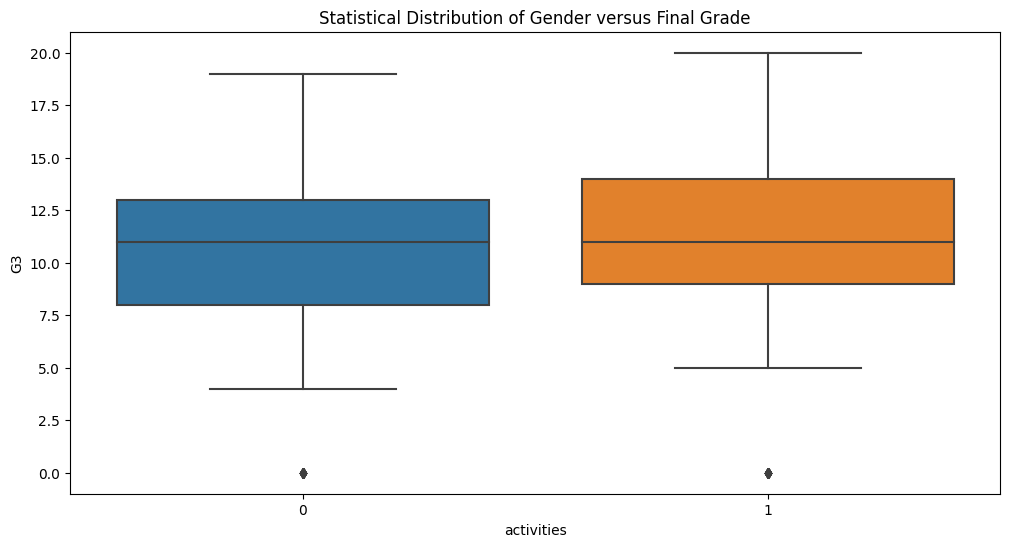

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot( x=data['activities'], y=data['G3'] )

plt.title('Statistical Distribution of Gender versus Final Grade')
plt.show()

Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
#importing Linear regression from sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print("Coefficients: \n", reg.coef_)

Coefficients: 
 [ 0.52561106 -0.3066944  -0.18988721  0.26664974 -0.19905843  0.04167696
  0.03618847 -0.25632295  0.48159574  0.02345498  0.30466119 -0.41395476
 -0.36544527 -0.26334783 -0.2589197   0.09396147 -0.05284817 -0.3070446
  0.21270722  0.07324194  0.04906164  0.16240012  0.96118958 -0.2075742
  0.04924348 -0.1831159   0.22323363  0.29404324 -0.09993119  0.57423506
  0.10438482 -0.2285338   0.36058845]


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 4.45


In [ ]:
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Coefficient of determination: 0.81


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

1.4930760594768964


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 3.27
Coefficient of determination: 0.86
1.332072557422939


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 4.31
Coefficient of determination: 0.82
1.4788208198055643


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg=LinearRegression()    #instantiating linear regression
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

Mean squared error: 4.72
Coefficient of determination: 0.79
1.5124618752379977


Decision Tree Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#Define model. Specify a number for random_state to ensure same results each run
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)

#Fit model
grade_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, random_state=1)

In [ ]:
pred=grade_model.predict(X_test)
print(pred)

[ 0.44444444 13.53846154 12.42857143 12.42857143  5.         10.
  3.         18.         10.          0.44444444  8.         13.
 13.53846154  7.         17.         11.125       5.          9.
  0.44444444 11.125      10.          9.          8.         11.16666667
 13.53846154  0.44444444  8.         15.          2.         10.
  7.         14.         18.         10.          8.          9.
 10.          2.          0.44444444  8.         11.         13.53846154
 19.          0.44444444 14.         14.         14.         19.
 13.53846154  9.         13.          7.          0.44444444  6.
 13.         15.          0.44444444 11.33333333 12.         11.8
  0.44444444 11.          9.         16.          4.         15.
 12.         15.         14.         11.          8.         14.
 14.         12.42857143  8.         12.         11.125       9.
  9.        ]


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))

Mean squared error: 2.86
Coefficient of determination: 0.88


In [ ]:
print(mean_absolute_error(y_test,pred))

1.1670889939877283


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[ 0.42857143 13.54545455 13.         12.          5.         12.
  0.42857143 18.         10.          0.42857143  6.         13.
 13.54545455  8.         17.         10.          6.          9.
  0.42857143 10.          9.         10.         10.         13.
 13.54545455  0.42857143  8.         15.          1.4         8.
  7.         11.         18.         10.         10.         10.
 10.          1.4         0.42857143  8.         11.         13.54545455
 19.          2.66666667 14.         14.         12.         19.
 13.54545455  6.         13.          5.          0.42857143  5.
 13.         15.          0.42857143 11.         12.         12.
  0.42857143 12.          8.         15.          4.         14.
 12.         15.         16.         11.          8.         16.
 14.         12.          8.         10.         10.         10.
  8.          0.42857143 10.         18.          8.         13.54545455
 11.         14.          1.4        10.          6.         13.54545455
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[ 0.5        13.54545455 13.         12.28571429  6.          5.
  0.5        18.         10.          0.5         7.         13.
 13.54545455 10.         17.         10.4         0.5         9.66666667
  0.5         9.          9.125       9.66666667 10.         11.
 13.54545455  0.5         7.         15.         10.          8.
 10.         11.         18.         10.          8.         10.
 10.         12.          0.5         9.         11.125      13.54545455
 18.          3.         14.         14.         11.         18.
 13.54545455  7.         13.          0.5         0.5         0.5
 13.         15.          0.5        12.28571429 13.         12.
  0.5        12.         10.         16.          5.         15.
 12.         15.         15.         12.          8.         15.
 14.         12.28571429  8.         12.         10.4         9.
  8.          3.         10.         18.          7.         13.54545455
 11.         14.          0.88888889 12.          6.         13.5

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.tree import DecisionTreeRegressor
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson',max_depth=10)
grade_model.fit(X_train,y_train)
pred=grade_model.predict(X_test)
print(pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test,pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))

[ 0.54545455 13.         12.         13.          4.         10.
  0.54545455 18.         10.          0.54545455  7.         12.
 13.          8.         16.         10.4         0.54545455 10.
  0.54545455 10.         10.         10.          9.         10.
 13.          0.54545455  7.         15.          1.11111111 10.
  7.         11.         18.         10.          7.         10.
 10.          1.11111111  0.54545455  8.         12.         14.
 18.          6.         14.         14.         11.         18.
 13.          6.         14.          0.54545455  0.54545455  0.54545455
 12.         15.          0.54545455 13.         13.         13.
  0.54545455 11.66666667 10.         15.          5.         13.
 12.         14.         16.         11.66666667 10.         15.
 14.         13.          8.         12.         11.          9.
  8.          9.         10.         18.          7.         15.
 11.         15.          1.11111111 11.          4.         13.
  9.          8. 

Random Forest Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor(random_state=1)

In [ ]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
preds=forest_model.predict(X_test)
print(preds)

[ 1.13 13.66 11.93 12.18  5.18  8.95  1.   16.31 12.19  1.17  7.49 12.52
 13.09  8.34 16.21 10.44  5.73  9.26  0.53 10.21  8.8   8.97  9.11 11.62
 13.54  0.7   7.9  15.36  4.32  8.79  7.57 11.85 16.31  9.87  8.16 10.04
  9.3   6.41  0.84  7.97 10.47 13.71 18.28  4.11 13.83 13.85 11.78 18.23
 13.4   8.18 13.19  5.38  1.66  5.43 12.31 15.11  0.73 11.73 12.64 12.28
  1.16 11.26  8.09 15.34  4.83 13.69 11.92 14.01 15.63 11.29  8.07 15.67
 14.05 12.26  8.03 11.07 10.42 10.15  8.24  3.68 10.84 18.14  8.66 13.73
 11.55 15.21  2.95 11.18  5.65 12.67  8.88  7.85  3.82  8.55  9.24  9.12
  4.51  9.43  2.01]


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))

Mean squared error: 2.31
Coefficient of determination: 0.90


In [ ]:
print(mean_absolute_error(y_test,preds))

1.0741414141414143


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 1.13 13.78 11.94 12.23  5.53  8.76  1.34 16.38 12.23  1.4   7.57 12.52
 13.26  8.73 16.25 10.33  5.65  9.5   0.26 10.1   8.84  9.81  9.02 11.57
 13.71  0.49  7.58 15.37  3.4   8.95  7.5  12.34 16.39  9.86  8.11 10.07
  9.45  7.13  0.75  8.21 10.89 13.86 18.3   2.27 13.98 13.86 12.21 18.56
 13.32  8.32 13.34  5.93  1.07  5.54 12.26 15.2   0.3  11.72 12.78 12.15
  1.43 11.31  8.11 15.42  5.02 13.81 12.37 14.02 15.54 11.46  8.98 15.37
 14.01 12.17  8.09 11.21 10.37  9.97  8.14]
Mean squared error: 1.52
Coefficient of determination: 0.93
0.8617721518987341


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.98 13.77 12.01 12.31  5.17  9.31  1.16 16.3  12.37  0.92  7.01 12.45
 13.18  8.24 16.18 10.38  5.99  9.34  0.53  9.96  8.8   9.28  9.2  11.6
 13.72  0.5   7.46 15.38  2.61  8.98  7.35 11.54 16.38  9.91  7.72 10.26
  9.16  5.92  0.08  7.98 10.53 13.78 18.22  2.15 13.91 13.81 11.86 18.29
 13.39  7.87 13.23  5.54  0.84  5.54 12.34 15.21  0.36 12.08 12.69 12.09
  0.74 11.08  7.76 15.39  4.93 13.72 11.88 14.01 15.61 10.78  9.09 15.56
 13.88 12.4   7.55 11.29 10.56 10.    7.97  2.12 10.86 18.1   8.78 13.82
 11.59 15.28  3.08 11.32  5.73 12.86  9.06  8.25  2.24  8.89  9.3   9.13
  4.22  9.49  1.18 15.46 10.51 11.7   8.94  3.98 17.92  9.58 10.45 13.03
  5.54  7.53  0.54 12.03  8.53  6.46  1.93  5.89  5.67 11.02  9.96]
Mean squared error: 2.27
Coefficient of determination: 0.90
0.996890756302521


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.76 13.57 12.05 12.37  5.05  9.8   1.23 16.35 12.28  1.27  7.11 12.86
 13.11  8.33 16.3  10.24  5.84  9.29  0.77  9.92  8.54  9.34  9.31 11.5
 13.61  0.67  7.57 15.27  4.88  9.46  7.59 11.72 16.41  9.9   7.59 10.13
  9.4   6.83  0.33  8.25 10.26 13.57 17.93  1.92 13.96 13.81 11.87 18.06
 13.08  7.07 13.17  5.54  0.83  5.53 12.49 15.08  0.83 12.1  12.92 12.15
  1.55 10.92  7.81 15.48  5.05 13.65 12.03 14.12 15.66 10.52  9.28 15.7
 13.97 12.51  7.64 10.93 10.43  9.81  7.74  1.9  10.4  18.02  8.56 13.24
 11.59 15.43  2.72 11.14  5.49 12.92  9.25  8.01  1.58  9.16  9.57  9.32
  4.24  9.74  2.06 15.42 10.47 11.55  9.31  3.94 17.91  9.89 10.74 12.99
  5.62  7.26  0.98 12.14  8.71  7.69  1.78  6.93  5.53 11.1  10.07  0.86
  5.46 15.32  3.96  7.84 13.05 13.43  8.92  5.56 13.71 13.16  8.26 10.17
  8.09 10.1  18.22 13.25 13.39 11.77 10.97]
Mean squared error: 2.82
Coefficient of determination: 0.88
1.090863309352518


Support Vector Regressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 5.3802152  13.56827012 11.25217589 12.06540364  6.58257245  9.26300399
  5.5503029  16.11792386 11.85693829  5.32264618  7.44551151 13.41704148
 12.9777326   8.54208594 15.94880682  9.77824168  5.70147998  9.19340813
  2.95559296 10.33774946  8.92250031  8.86704978  9.3347364  11.74891028
 14.01893755  2.97323153  7.62566659 14.58028671  9.00461146  9.20351421
  7.2118949  12.21269764 15.95415082  9.49781665  7.1012514  10.55271991
  8.99915733  8.67761583  3.04971692  7.9325653  11.02270905 13.45233069
 14.01449298  7.17746076 14.15898264 14.74136176 11.94042465 14.74455952
 12.3752411   8.64443595 12.77587114  5.52110038  3.1152937   5.29811477
 12.78885709 14.81563572  2.85125161 11.80756365 12.61153496 12.8994733
  3.77574838 11.52487235  8.2091382  14.82783396  6.23722128 14.21416238
 12.37123004 14.60676919 15.17133881 11.40502248  8.22569411 15.39569892
 14.12191871 12.67331849  7.27598809 11.19490254 10.48519087 10.07782749
  7.18198264  6.7910211  11.14397248 17.0615043   8.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 5.2795308  13.58513072 11.26716146 12.09652475  6.55085596  9.25071254
  5.44176286 16.15731727 11.9304395   5.1993289   7.32264679 13.41710857
 12.99495784  8.49561895 16.0222393   9.77974967  5.52705726  9.11269702
  2.67488686 10.30766306  8.94142925  8.85882635  9.18895343 11.79235523
 14.04085977  2.70012674  7.55463713 14.64973029  8.91517357  9.13242136
  7.10823725 12.162961   16.02253659  9.49857529  7.10882258 10.4959854
  8.99389411  8.64698784  2.73928944  7.90688041 10.98271409 13.52920369
 14.20541419  7.01226651 14.1983812  14.75905984 11.97585916 14.9265033
 12.45180977  8.72506754 12.82611977  5.40191248  2.78734316  5.22272953
 12.80923784 14.81428109  2.59420034 11.82784589 12.61544646 12.82359264
  3.38693146 11.50436185  8.10930638 14.86826846  6.15855862 14.26142202
 12.32182348 14.55806557 15.17742794 11.40435085  8.19892198 15.41237249
 14.18271584 12.69375337  7.17890715 11.12526482 10.46842961 10.04984648
  7.12996514  6.68231    11.13040319 17.1939145   8.4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 5.36690475 13.59503731 11.18127463 12.08741665  6.54412356  9.30420473
  5.53228433 16.09675344 12.00905114  5.28679105  7.38098115 13.33693341
 13.00000739  8.57375198 15.97495229  9.82301798  5.55040535  9.16231851
  2.78346947 10.34581855  8.9181185   8.92763061  9.20252941 11.8198036
 14.07953698  2.79287093  7.49050818 14.59622076  8.97673882  9.18977873
  7.14693103 12.19037908 15.99313882  9.50025565  7.17400737 10.49880999
  9.06514499  8.72459961  2.81336208  7.97844483 11.00600087 13.54212704
 14.14660591  7.08699301 14.21867328 14.71907403 12.00912105 14.90647649
 12.45517016  8.55787987 12.8938958   5.42133318  2.88766873  5.3015844
 12.77539104 14.82979675  2.71150266 11.83219544 12.55318065 12.84589256
  3.44159509 11.52201821  8.16900062 14.82677157  6.17805382 14.27268329
 12.34565015 14.55521782 15.13924279 11.42416341  8.27297226 15.42941215
 14.16738494 12.72022389  7.25835702 11.13244876 10.54241062 10.07892987
  7.17223684  6.80881059 11.17145364 17.1502432   8.4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,y_train)
preds=svr_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 5.3802152  13.56827012 11.25217589 12.06540364  6.58257245  9.26300399
  5.5503029  16.11792386 11.85693829  5.32264618  7.44551151 13.41704148
 12.9777326   8.54208594 15.94880682  9.77824168  5.70147998  9.19340813
  2.95559296 10.33774946  8.92250031  8.86704978  9.3347364  11.74891028
 14.01893755  2.97323153  7.62566659 14.58028671  9.00461146  9.20351421
  7.2118949  12.21269764 15.95415082  9.49781665  7.1012514  10.55271991
  8.99915733  8.67761583  3.04971692  7.9325653  11.02270905 13.45233069
 14.01449298  7.17746076 14.15898264 14.74136176 11.94042465 14.74455952
 12.3752411   8.64443595 12.77587114  5.52110038  3.1152937   5.29811477
 12.78885709 14.81563572  2.85125161 11.80756365 12.61153496 12.8994733
  3.77574838 11.52487235  8.2091382  14.82783396  6.23722128 14.21416238
 12.37123004 14.60676919 15.17133881 11.40502248  8.22569411 15.39569892
 14.12191871 12.67331849  7.27598809 11.19490254 10.48519087 10.07782749
  7.18198264  6.7910211  11.14397248 17.0615043   8.

K-Neighbors Regression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.         13.66666667 11.66666667 13.          6.         11.
  0.         16.         12.          2.66666667  7.         13.33333333
 12.          7.66666667 15.          9.33333333  6.         10.33333333
  0.         10.          9.          9.66666667 10.33333333 10.33333333
 14.33333333  0.          7.         14.66666667  6.          8.66666667
  6.66666667 12.66666667 16.         10.          9.         10.
 10.          6.33333333  0.          8.66666667 11.         13.33333333
 13.66666667  9.         14.         14.66666667 11.33333333 13.66666667
 13.          8.66666667 12.66666667  7.          0.          6.33333333
 11.33333333 14.66666667  0.         12.66666667 11.66666667 13.33333333
  0.         11.66666667  7.33333333 14.          6.         14.33333333
 11.66666667 16.         15.33333333 11.33333333  9.66666667 16.
 13.66666667 13.33333333  8.         11.33333333 10.66666667 11.33333333
  8.66666667]
Mean squared error: 2.09
Coefficient of determination: 0.91
0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.         13.66666667 11.66666667 13.          6.         11.
  0.         16.         12.          2.66666667  7.         13.33333333
 12.          7.66666667 15.          9.33333333  6.         10.33333333
  0.         10.          9.          9.66666667  9.66666667 10.33333333
 14.33333333  0.          7.         14.66666667  3.          8.66666667
  6.66666667 12.         16.66666667 10.          9.         10.33333333
 10.          7.33333333  0.          8.66666667 10.66666667 13.33333333
 13.66666667  4.66666667 14.         14.66666667 11.33333333 13.66666667
 13.          8.66666667 12.66666667  7.          0.          6.33333333
 11.33333333 14.66666667  0.         12.66666667 12.33333333 13.33333333
  0.         12.33333333  7.33333333 14.          6.         14.33333333
 11.66666667 16.         15.33333333 11.33333333  8.         16.
 13.66666667 13.33333333  8.         11.33333333 10.66666667 11.33333333
  8.66666667  5.         10.         16.66666667  9.66666667 12.
 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.         13.66666667 11.66666667 13.          6.         11.
  0.         16.         12.          2.66666667  7.         12.
 12.          9.         15.          9.33333333  6.         10.33333333
  0.         10.          9.33333333  9.66666667 10.66666667 10.33333333
 14.33333333  0.          7.         14.66666667  3.          8.66666667
  6.66666667 12.         16.66666667 10.          9.         10.33333333
 10.          7.33333333  0.          8.66666667 10.66666667 13.33333333
 13.66666667  2.         14.         14.66666667 11.33333333 13.66666667
 13.          8.66666667 12.66666667  7.          0.          4.33333333
 11.33333333 14.66666667  0.         12.66666667 12.33333333 12.66666667
  0.         12.33333333  9.33333333 14.          6.         14.33333333
 11.66666667 16.         15.33333333 11.33333333  9.33333333 16.
 13.66666667 13.66666667  8.         11.33333333 10.66666667 11.33333333
  8.66666667  6.         10.         16.66666667  9.66666667 12.
 11.666666

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
print(preds)
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))
print("Coefficient of determination: %.2f" % r2_score(y_test,preds))
print(mean_absolute_error(y_test,preds))

[ 0.         13.66666667 11.66666667 13.          6.          7.33333333
  0.         16.         11.66666667  2.66666667  8.         11.66666667
 11.66666667  9.         15.          9.33333333  6.         10.33333333
  0.         10.          9.33333333  9.66666667 10.66666667 10.33333333
 14.33333333  0.          7.         14.66666667  3.          8.66666667
  7.66666667 12.33333333 16.66666667 10.          8.         10.33333333
 10.          7.33333333  0.          8.66666667 10.66666667 13.
 13.66666667  2.         14.33333333 14.66666667 11.33333333 13.66666667
 11.66666667  9.66666667 12.66666667  7.          0.          4.33333333
 11.33333333 14.66666667  0.         12.66666667 12.33333333 12.66666667
  0.         12.33333333  9.33333333 14.          6.         14.33333333
 11.66666667 16.         15.33333333 11.33333333  9.33333333 16.
 14.66666667 13.66666667  8.         11.33333333 10.66666667 11.33333333
  8.66666667  2.33333333 10.         16.66666667  9.66666667 12.
 1